In [343]:
import numpy as np
import pandas as pd
import statistics 

import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.formula.api as smf



# Massachusetts Interstate Migration 

### Are Massachusetts residents migrating towards cities?

Data Accessing & Sources

Using Massachusetts birth data we are attempting to find if there has been a migration towards cities/densely-populated-area in the state. According to the 2010 census Massachusetts’ smallest city is Palmer at 12,140. While it’s largest town is Brookline with 58,732. This is because in Massachusetts a city is defined by the kind of government not the population. Thus in this journal we are describing densely-populated area as having more than 30,000 residents. For municipality birth data we are using the the Massachusetts government websites’ annual birth reports
For each report we converted the datasets found on the pdfs to csv files and manually cleaned small differences, such as column names or differences in town names. For example both Manchester-by-the-sea and Manchester were used in the datafiles. The town of Aquinnah(Gay Head) also had differences in spelling from year to year.




For population totals of municipalities in Massachusetts we looked at the UMass Donahue Institute’s population estimates(“Population_1930_to_2018_Final”), which are based on the US Census. Unfortunately yearly estimates are only avai lable from 2010-2018. So we are only using total population counts \nfor  2000, 2010 & 2015.
      

In [122]:
#import 2000 data
data = pd.read_csv("2000CleanedDataMABirths2.csv", index_col = "Community")
df2000 = pd.DataFrame(data, columns = ["Occurrence Births", "Resident Births"])

In [123]:
#import 2005 data
data = pd.read_csv("2005BirthDataCleaned4.csv", index_col = "Community")
df2005 = pd.DataFrame(data, columns = [ "Occurrence Births", "Resident Births"])

In [124]:
#Import 2010 Data
data = pd.read_csv("2010CleanedDataMABirths.csv", index_col = "Community")
df2010 = pd.DataFrame(data, columns = [ "Occurrence Births", "Resident Births"])

In [125]:
#Import 2015 Data
data = pd.read_csv("2015CleanedDataMABirths.csv", index_col = "Community")
df2015 = pd.DataFrame(data, columns = [ "Occurrence Births", "Resident Births"])

In [126]:
#Import Municipiality Population Data 
data = pd.read_csv("Population_1930_to_2018_Final.csv", index_col = "Area Name")
totalPopulationData = pd.DataFrame(data, columns = ["2000", "2010", "2015"])



Some towns and cities share a name with their county which caused errors in our data. Thus we removed county information from the Populations csv.


In [127]:
#Function to get Populations for each town from Population_1930_to_2018_Final.csv
#Takes in TownName String returns Populations for town in 2000,2010, & 2015 as list
def getTownData(townName):
    #iterate through dataframe
    for i, j in totalPopulationData.iterrows():
        if(townName in i):
            return([int((j["2000"].replace("\t", "").replace(",", ""))),
                    int(j["2010"].replace("\t", "").replace(",", "")),
                    int(j["2015"].replace("\t", "").replace(",", ""))])
        


In [128]:
#Get birth data for given data for given town
#takes in string townName, dataFrame data
#returns list with OccurenceBirth and ResidentBirth for town
def getBirthData(townName, data):
    for i, j in data.iterrows():
            if(townName.lower() in i.lower()):
                OCBirth = j["Occurrence Births"]
                RBirth  = j["Resident Births"]
                if isinstance(OCBirth, str):
                    return ([int(j["Occurrence Births"].replace(",", "")), int(j["Resident Births"].replace(",", ""))])
                else: return [OCBirth, RBirth]



In [282]:
#Dictionary w town name, total population in: 2000, 2010 & 2015, 
#occurence birth and resident births for 2000, 2005, 2010 and 2015
TownBirthDictionary = {}



for i, j in df2000.iterrows(): 
    if ((i != "STATE TOTAL") & (i != None) & (i != "Manchester-by-the-Sea")): 
    
    #totalPopulation data
    #if we were doing more years we'd make a function, but over 4 years
        elementPopuData = getTownData(i)
        bd2000 = getBirthData(i, df2000)
        bd2005 = getBirthData(i, df2005)
        bd2010 = getBirthData(i, df2010)
        bd2015 = getBirthData(i, df2015)
        
        #Years we are placing in Dictionary
        TownBirthDictionary[i] = {}
        TownBirthDictionary[i]["2000"] = {}
        TownBirthDictionary[i]["2005"] = {}
        TownBirthDictionary[i]["2010"] = {}
        TownBirthDictionary[i]["2015"] = {}

        #2000 data
        TownBirthDictionary[i]["2000"]["TP"] = elementPopuData[0]
        TownBirthDictionary[i]["2000"]["OBirth"] = bd2000[0]
        TownBirthDictionary[i]["2000"]["RBirth"] = bd2000[1]
        
        #2005 data
        TownBirthDictionary[i]["2005"]["TP"] = None
        TownBirthDictionary[i]["2005"]["OBirth"] = bd2005[0]
        TownBirthDictionary[i]["2005"]["RBirth"] = bd2005[1]
        
        #2010 data
        TownBirthDictionary[i]["2010"]["TP"] = elementPopuData[1]
        TownBirthDictionary[i]["2010"]["OBirth"] = bd2010[0]
        TownBirthDictionary[i]["2010"]["RBirth"] = bd2010[1]
        
        #2015 data
        TownBirthDictionary[i]["2015"]["TP"] = elementPopuData[2]
        TownBirthDictionary[i]["2015"]["OBirth"] = bd2015[0]
        TownBirthDictionary[i]["2015"]["RBirth"] = bd2015[1]
    

350


In [283]:
#Towns that have more than 30,000 in 2000


Dense2000 = []
NotDense2000 = []
for key in TownBirthDictionary:
    if (TownBirthDictionary[key]["2000"]["TP"] > 30000):
        Dense2000.append(key)
    else: 
        NotDense2000.append(key)
        

350


In [131]:
#Towns that have more than 30,000 in 2010


Dense2010 = []
NotDense2010 = []
for key in TownBirthDictionary:
    if (TownBirthDictionary[key]["2010"]["TP"] > 30000):
        Dense2010.append(key)
    else: 
        NotDense2010.append(key)
       

In [132]:
#Towns that have more than 30,000 in 2015


Dense2015 = []
NotDense2015 = []
for key in TownBirthDictionary:
    if (TownBirthDictionary[key]["2015"]["TP"] > 30000):
        Dense2015.append(key)
    else: 
        NotDense2015.append(key)
        
      

## Towns that grow over 30,000 in the 20 year time span

There are only 5 Towns that grow to cross the 30,000 size disambiguation that seperates a town from a city.
SThese towns are Dracut, Franklin, Needham, North Andover and Tewksbury. There is no more than a 3,600 increase for any of these towns. Because of this we made sure to use the population of 2000 to decide wether a munipiality was densely or sparsely populated.

In [133]:
#Towns that became densely populated
GrowthTowns = []

for i in range(len(NotDense2000)):
    if ((NotDense2000[i] not in NotDense2010) or 
        (NotDense2000[i] not in NotDense2015)):
        GrowthTowns.append(NotDense2000[i])

print(GrowthTowns) #['Dracut', 'Needham', 'North Andover', 'Tewksbury']

print("\nDracut")
print(TownBirthDictionary['Dracut'])
print("\nFranklin")
print(TownBirthDictionary['Franklin'])
print("\nNeedham")
print(TownBirthDictionary['Needham'])
print("\nNorth Andover")
print(TownBirthDictionary['North Andover'])
print("\nTewksbury")
print(TownBirthDictionary['Tewksbury'])

['Dracut', 'Franklin', 'Needham', 'North Andover', 'Tewksbury']

Dracut
{'2000': {'TP': 28562, 'OBirth': 1, 'RBirth': 375}, '2005': {'TP': None, 'OBirth': 2, 'RBirth': 373}, '2010': {'TP': 29457, 'OBirth': 0, 'RBirth': 322}, '2015': {'TP': 31045, 'OBirth': 0, 'RBirth': 348}}

Franklin
{'2000': {'TP': 29560, 'OBirth': 3, 'RBirth': 523}, '2005': {'TP': None, 'OBirth': 1, 'RBirth': 427}, '2010': {'TP': 31635, 'OBirth': 1, 'RBirth': 284}, '2015': {'TP': 32892, 'OBirth': 1, 'RBirth': 239}}

Needham
{'2000': {'TP': 28478, 'OBirth': 2, 'RBirth': 401}, '2005': {'TP': None, 'OBirth': 0, 'RBirth': 298}, '2010': {'TP': 28886, 'OBirth': 3, 'RBirth': 267}, '2015': {'TP': 30489, 'OBirth': 4, 'RBirth': 256}}

North Andover
{'2000': {'TP': 26475, 'OBirth': 0, 'RBirth': 370}, '2005': {'TP': None, 'OBirth': 0, 'RBirth': 325}, '2010': {'TP': 28352, 'OBirth': 0, 'RBirth': 299}, '2015': {'TP': 30025, 'OBirth': 0, 'RBirth': 313}}

Tewksbury
{'2000': {'TP': 28851, 'OBirth': 0, 'RBirth': 391}, '2005': {'TP': 

## Using Occurence Births

There was an attempt to use Occurence Births to decide wether a town was sparsely populated. The idea being that towns with zero occurence births may not have their own facilities such as a hospitals. However there was no correlation between occurence births and town size.

In [134]:
#Towns with 0 occurence births, thus towns that have no hospitals
NoOccurenceBirth = []
OccurenceBirth = []
for key in TownBirthDictionary:
    if ((TownBirthDictionary[key]["2000"]["OBirth"] == 0) &
        (TownBirthDictionary[key]["2005"]["OBirth"] == 0) &
        (TownBirthDictionary[key]["2010"]["OBirth"] == 0) &
        (TownBirthDictionary[key]["2015"]["OBirth"] == 0)):
        NoOccurenceBirth.append(key)
    else: 
        OccurenceBirth.append(key)



In [279]:
SmallTown = []

for key in TownBirthDictionary:
    if ((key in NoOccurenceBirth) & (key in NotDense2000)):
        SmallTown.append(key)
    if ((key in NoOccurenceBirth) & (key not in NotDense2000)):
        print(key)

len(SmallTown) #78
len(NoOccurenceBirth) #78
len(NotDense2000) #297


297

In this section we found that towns with a zero occurence rate and towns with a positive occurence rate had a similar max. Both maxes being near the cut-off for sparsely populated areas. Thus we kept with our numerical cut-off.

In [136]:
SmallTownMax = 0
Town = ""

for item in SmallTown:
    if (TownBirthDictionary[item]["2000"]["TP"] > SmallTownMax ):
        SmallTownMax = TownBirthDictionary[item]["2000"]["TP"]
        Town = item
    if (TownBirthDictionary[item]["2010"]["TP"] > SmallTownMax ):
        SmallTownMax = TownBirthDictionary[item]["2010"]["TP"]
        Town = item
    if (TownBirthDictionary[item]["2015"]["TP"] > SmallTownMax ):
        SmallTownMax = TownBirthDictionary[item]["2015"]["TP"]
        Town = item
    

print(SmallTownMax)
print(Town)

30025
North Andover


In [137]:
NotSmallEnoughTown = []

for item in NotDense2000:
    if (item not in SmallTown):
        NotSmallEnoughTown.append(item)
        

In [138]:
NotSmallEnoughTownMax = 0
MaxTown = ""

for item in NotSmallEnoughTown:
    if (TownBirthDictionary[item]["2000"]["TP"] > NotSmallEnoughTownMax ):
        NotSmallEnoughTownMax = TownBirthDictionary[item]["2000"]["TP"]
        MaxTown = item
    if (TownBirthDictionary[item]["2010"]["TP"] > NotSmallEnoughTownMax ):
        NotSmallEnoughTownMax = TownBirthDictionary[item]["2010"]["TP"]
        MaxTown = item
    if (TownBirthDictionary[item]["2015"]["TP"] > NotSmallEnoughTownMax ):
        NotSmallEnoughTownMax = TownBirthDictionary[item]["2015"]["TP"]
        MaxTown = item

        
print(NotSmallEnoughTownMax)
print(MaxTown)

32892
Franklin


## Large DataSet 

Because of the large amount of munipialities in Massachusetts(which is 350), we decided to start analyzing by finding the averages. First we found the average population for sparse areas. The high rvalue of .98 from the linear regression shows a high degree of steadiness in our data. We used the linear regression to find the population data for 2005. 

In [286]:
#Not Densely populated average growth
TPAverage00Counter = 0

TPAverage10Counter= 0

TPAverage15Counter = 0


for item in NotDense2000:
    TPAverage00Counter = TPAverage00Counter + TownBirthDictionary[item]["2000"]['TP']
    TPAverage10Counter = TPAverage10Counter + TownBirthDictionary[item]["2010"]['TP']
    TPAverage15Counter = TPAverage15Counter + TownBirthDictionary[item]["2015"]['TP']


#2000 average
TPAverage00 = round((TPAverage00Counter/ len(NotDense2000)), 2)

#2010 average
TPAverage10 = round((TPAverage10Counter/ len(NotDense2000)),2)

#2015 average
TPAverage15 = round((TPAverage15Counter/ len(NotDense2000)), 2)

print(TPAverage00)
print(TPAverage10)
print(TPAverage15)

#populated average growth

a = [2000, 2010, 2015]
b = [TPAverage00,TPAverage10,TPAverage15]
linregress(a, b)




9461.39
9803.53
10130.37


LinregressResult(slope=43.115142857142956, intercept=-76791.14857142876, rvalue=0.9843900842342039, pvalue=0.11263204411045757, stderr=7.708615837000081)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()


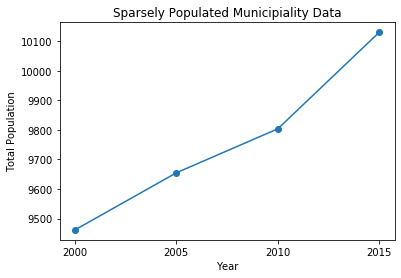

In [287]:
#the value for 2005 is half the change between 2000 and 2010
# Create a dataset:
data = [["2000", TPAverage00],["2005", 9654.7],["2010", TPAverage10],["2015", TPAverage15]]
df=pd.DataFrame(data, columns = ["x", "y"])
plt.ylabel("Total Population")   
plt.xlabel("Year") 
plt.title("Sparsely Populated Municipiality Data")


# plot
plt.plot( 'x', 'y', data=df, linestyle='solid', marker='o')

plt.show()


In [191]:
#Not Densely populated average growth
DeTPAverage00Counter = 0

DeTPAverage10Counter= 0

DeTPAverage15Counter = 0


for item in Dense2000:
    DeTPAverage00Counter = DeTPAverage00Counter + TownBirthDictionary[item]["2000"]['TP']
    DeTPAverage10Counter = DeTPAverage10Counter + TownBirthDictionary[item]["2010"]['TP']
    DeTPAverage15Counter = DeTPAverage15Counter + TownBirthDictionary[item]["2015"]['TP']


#2000 average
DeTPAverage00 = round((DeTPAverage00Counter/ len(Dense2000)), 2)

#2010 average
DeTPAverage10 = round((DeTPAverage10Counter/ len(Dense2000)),2)

#2015 average
DeTPAverage15 = round((DeTPAverage15Counter/ len(Dense2000)), 2)

print(DeTPAverage00)
print(DeTPAverage10)
print(DeTPAverage15)

#populated average growth

a = [2000, 2010, 2015]
b = [DeTPAverage00,DeTPAverage10,DeTPAverage15]
linregress(a, b)




67329.17
69156.91
71983.34


LinregressResult(slope=292.0631428571428, intercept=-517070.33857142844, rvalue=0.9512954430637882, pvalue=0.19950718914766036, stderr=94.64717407211211)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


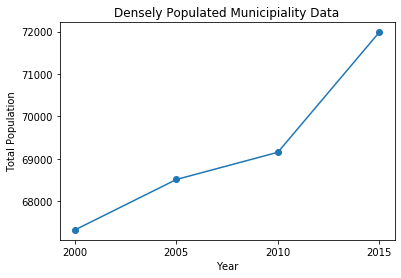

In [289]:
data = [["2000", DeTPAverage00],["2005", 68516.26],["2010", DeTPAverage10],["2015", DeTPAverage15]]
df=pd.DataFrame(data, columns = ["x", "y"])
                
# plot
plt.plot( 'x', 'y', data=df, linestyle='solid', marker='o')
plt.ylabel("Total Population")   
plt.xlabel("Year") 
plt.title("Densely Populated Municipiality Data")

plt.show()

On average, both less dense and more dense areas have experienced a population growth.

However we wanted a more nuanced look. So we decided to take a closer look at which municipialities were increasing and which towns were decreasing.
        

In [294]:
#munipialities that have decreased in population vs municipialities that have inreased

IncreasedSparse = []
IncreaseSparseSize = []

DecreaseSparse = []
DecreaseSparseSize = []

IncreaseDense = []
IncreaseDenseSize = []

DecreaseDense = []
DecreaseDenseSize = []

for key in TownBirthDictionary:
    if key in NotDense2000:
        if ((TownBirthDictionary[key]["2015"]["TP"] - TownBirthDictionary[key]["2000"]["TP"]) > 0):
            IncreasedSparse.append(key)
            IncreaseSparseSize.append(TownBirthDictionary[key]["2000"]["TP"])
        else:
            DecreaseSparse.append(key)
            DecreaseSparseSize.append(TownBirthDictionary[key]["2000"]["TP"])

    else:
        if ((TownBirthDictionary[key]["2015"]["TP"] - TownBirthDictionary[key]["2000"]["TP"]) > 0):
            IncreaseDense.append(key)
            IncreaseDenseSize.append(TownBirthDictionary[key]["2000"]["TP"])

        else:
            DecreaseDense.append(key)
            DecreaseDenseSize.append(TownBirthDictionary[key]["2000"]["TP"])


            
IncreasedSparseRatio = len(IncreasedSparse)/len(NotDense2000)
DecreaseSparseRatio = len(DecreaseSparse)/len(NotDense2000)

IncreaseDenseRatio = len(IncreaseDense)/len(Dense2000)
DecreaseDenseRatio = len(DecreaseDense)/len(Dense2000) 



len(DecreaseDense) #5
len(IncreaseDense) #48
len(DecreaseSparse) #67
len(IncreasedSparse) #230



230

## Decreasing Munipialities vs Increasing Municipialities

We found that about a quarter of sparse areas were decreasing in size. Only 10% of dense areas had a decrease in size.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


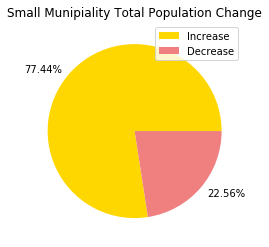

In [295]:
#Bar Graph for small municipialities

label = [(str(round((IncreasedSparseRatio * 100), 2)) + "%") ,
         (str(round((DecreaseSparseRatio * 100), 2)) + "%")] 
sizes = [len(IncreasedSparse), len(DecreaseSparse)]
colors = ['gold', 'lightcoral']

plt.pie(sizes, labels=label, colors=colors )
plt.title("Small Munipiality Total Population Change")

plt.legend(sizes, labels=labels, loc="best")
plt.show()



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


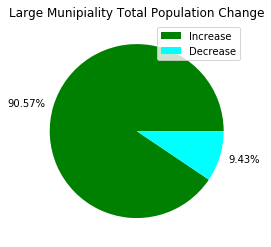

In [296]:
#Bar Graph for large municipialities

label = [(str(round((IncreaseDenseRatio * 100), 2)) + "%") ,
         (str(round((DecreaseDenseRatio * 100), 2)) + "%")] 
sizes = [len(IncreaseDense), len(DecreaseDense)]
colors = ['green', 'aqua']

plt.pie(sizes, labels=label, colors=colors )
plt.title("Large Munipiality Total Population Change")
plt.legend(sizes, labels=labels, loc="best")
plt.show()


In [297]:
ISA = round(statistics.mean(IncreaseSparseSize),0)
DSA = round(statistics.mean(DecreaseSparseSize),0)

IDA = round(statistics.mean(IncreaseDenseSize),0)
DDA = round(statistics.mean(DecreaseDenseSize),0)


print("Increasing Sparse Area Population average is", ISA)
print("Decreasing Sparse Area Population average is", DSA)
#Towns that are decreasing in size tend towards a smaller total population.
#TOwns that are increasing have an average size that is almost double decreasing towns

print("Increasing Dense Area Population average is", IDA)
print("Decreasing Dense Area Population average is", DDA)
#This is similar for municipialities, in that larger municipialities tend to grow. 
#However the rate is not as extreme as small municipialities


Increasing Sparse Area Population average is 10466.0
Decreasing Sparse Area Population average is 6014.0
Increasing Dense Area Population average is 69166.0
Decreasing Dense Area Population average is 49696.0


In [304]:
#function to get list population data for a specific year and area type
#takes the year as a string and a list of places names to include
#returns population data as a list
def getDataAsList(year, restrictionList):
    dataList = []
    for item in restrictionList:
        dataList.append(TownBirthDictionary[item][year]["TP"])
    return dataList



230
230


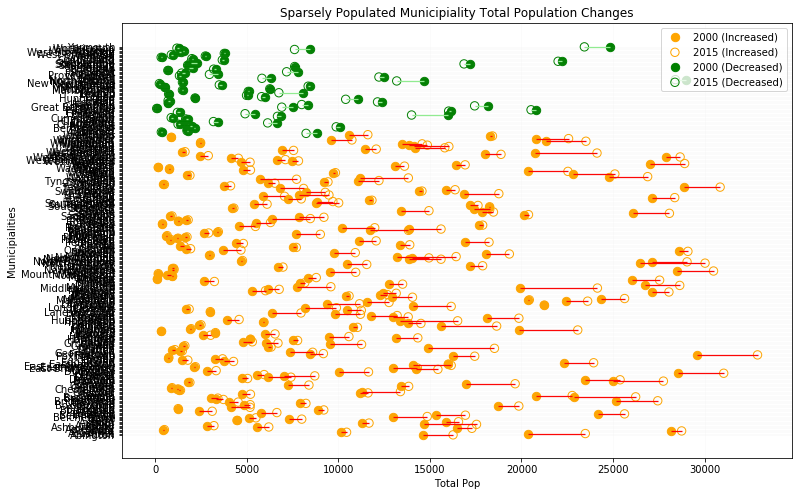

In [336]:
fig3, ax3 = plt.subplots(figsize=(12, 8))

IncreasedSparse2000 = getDataAsList("2000", IncreasedSparse)
IncreasedSparse2015 = getDataAsList("2015", IncreasedSparse)

DecreasedSparse2000 = getDataAsList("2000", DecreaseSparse)
DecreasedSparse2015 = getDataAsList("2015", DecreaseSparse)

ax3.scatter(y=IncreasedSparse, x= IncreasedSparse2000, marker='o', color='orange', label='2000 (Increased)', s = 70)
ax3.scatter(y=IncreasedSparse, x=IncreasedSparse2015, marker='o', color='orange', label='2015 (Increased)', facecolor='none', s = 70)

ax3.scatter(y=DecreaseSparse, x=DecreasedSparse2000, marker='o', color='green', label='2000 (Decreased)', s = 70)
ax3.scatter(y=DecreaseSparse, x=DecreasedSparse2015, marker='o', color='green', label='2015 (Decreased)', facecolor='none', s = 70)

for i in range(len(IncreasedSparse)):
    ax3.arrow(y=IncreasedSparse[i], x=IncreasedSparse2000[i], dy=0, dx=(IncreasedSparse2015[i] - IncreasedSparse2000[i]), length_includes_head=True, color='red', width=0, linewidth=1.25)
    
    
for i in range(len(DecreaseSparse)):
    ax3.arrow(y=DecreaseSparse[i], x=DecreasedSparse2000[i], dy=0, dx=(DecreasedSparse2015[i] - DecreasedSparse2000[i]), length_includes_head=True, color='lightgreen', width=0, linewidth=1.25)
    
    

ax3.set_yticks(NotDense2000)
ax3.set_yticklabels(NotDense2000)
ax3.set_ylabel("Municipialities")
ax3.set_xlabel("Total Pop")
ax3.grid(alpha=0.05)
ax3.set_title("Sparsely Populated Municipiality Total Population Changes")

ax3.legend();

Of note is that most of the municipialities with the smallest populations had little change. While larger municipialities had much greater changes in population. The greatest changes are seen by those municipialities that are increasing. This supports the trends in the previous linegraphs that show a trend in population increase.

# Resident Births

In [ ]:
#Comparison between resident births in 2000 and resident births in 2015

RBirth_decrease = []
RBirth_increase = []
for key in TownBirthDictionary:
    if (TownBirthDictionary[key]["2000"]["RBirth"] > TownBirthDictionary[key]["2015"]["RBirth"]):
        RBirth_decrease.append(key)
    else:
        RBirth_increase.append(key)

In [337]:
#find rbirth in non dense find average population growth
RBAverage00Counter = 0

RBAverage05Counter = 0

RBAverage10Counter= 0

RBAverage15Counter = 0


for item in NotDense2000:
    RBAverage00Counter = RBAverage00Counter + TownBirthDictionary[item]["2000"]['RBirth']
    RBAverage05Counter = RBAverage05Counter + TownBirthDictionary[item]["2005"]['RBirth']
    RBAverage10Counter = RBAverage10Counter + TownBirthDictionary[item]["2010"]['RBirth']
    RBAverage15Counter = RBAverage15Counter + TownBirthDictionary[item]["2015"]['RBirth']
    
print(RBAverage00Counter)
print(RBAverage05Counter)
print(RBAverage10Counter)
print(RBAverage15Counter)
#2000 Resident birth average
RBAverage00 = round((RBAverage00Counter/ len(NotDense2000)), 2)

#2005 Resident birth average
RBAverage05 = round((RBAverage05Counter/ len(NotDense2000)), 2)

#2010 Resident birth average
RBAverage10 = round((RBAverage10Counter/ len(NotDense2000)),2)

#2015 Resident birth average
RBAverage15 = round((RBAverage15Counter/ len(NotDense2000)), 2)
print(RBAverage00)
print(RBAverage05)
print(RBAverage10)
print(RBAverage15)
#resident birth average growth average growth

a = [2000, 2005, 2010, 2015]
b = [RBAverage00,RBAverage05, RBAverage10,RBAverage15]
linregress(a, b)


34346
31110
27465
26898
115.64
104.75
92.47
90.57


LinregressResult(slope=-1.7498000000000005, intercept=3613.581000000001, rvalue=-0.9663343386717176, pvalue=0.033665661328282415, stderr=0.3294338780392811)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


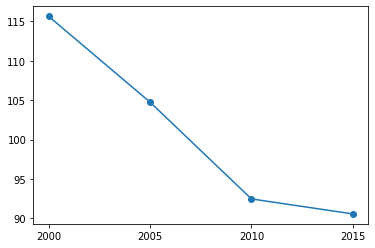

In [338]:
data = [["2000", RBAverage00],["2005", RBAverage05],["2010", RBAverage10],["2015", RBAverage15]]
df=pd.DataFrame(data, columns = ["x", "y"])
                

# plot
plt.plot( 'x', 'y', data=df, linestyle='solid', marker='o')

plt.show()

In [339]:
RBDenseAverage00Counter = 0

RBDenseAverage05Counter = 0

RBDenseAverage10Counter= 0

RBDenseAverage15Counter = 0


for item in Dense2000:
    RBDenseAverage00Counter = RBDenseAverage00Counter + TownBirthDictionary[item]["2000"]['RBirth']
    RBDenseAverage05Counter = RBDenseAverage05Counter + TownBirthDictionary[item]["2005"]['RBirth']
    RBDenseAverage10Counter = RBDenseAverage10Counter + TownBirthDictionary[item]["2010"]['RBirth']
    RBDenseAverage15Counter = RBDenseAverage15Counter + TownBirthDictionary[item]["2015"]['RBirth']
    
print(RBDenseAverage00Counter)
print(RBDenseAverage05Counter)
print(RBDenseAverage10Counter)
print(RBDenseAverage15Counter)
#2000 Resident birth average
RBDenseAverage00 = round((RBDenseAverage00Counter/ len(Dense2000)), 2)

#2005 Resident birth average
RBDenseAverage05 = round((RBDenseAverage05Counter/ len(Dense2000)), 2)

#2010 Resident birth average
RBDenseAverage10 = round((RBDenseAverage10Counter/ len(Dense2000)),2)

#2015 Resident birth average
RBDenseAverage15 = round((RBDenseAverage15Counter/ len(Dense2000)), 2)
print(RBDenseAverage00)
print(RBDenseAverage05)
print(RBDenseAverage10)
print(RBDenseAverage15)
#resident birth average growth average growth

a = [2000, 2005, 2010, 2015]
b = [RBDenseAverage00,RBDenseAverage05, RBDenseAverage10,RBDenseAverage15]
linregress(a, b)


46592
44950
44757
44000
879.09
848.11
844.47
830.19


LinregressResult(slope=-3.0067999999999984, intercept=6886.615999999997, rvalue=-0.9425928380264503, pvalue=0.057407161973549656, stderr=0.7532503435113735)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


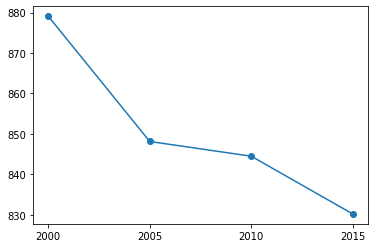

['Amherst', 'Andover', 'Arlington', 'Attleboro', 'Barnstable', 'Bedford', 'Beverly', 'Billerica', 'Boston', 'Braintree', 'Brockton', 'Brookline', 'Cambridge', 'Chelmsford', 'Chelsea', 'Chicopee', 'Dartmouth', 'Everett', 'Fall River', 'Falmouth', 'Fitchburg', 'Framingham', 'Gloucester', 'Haverhill', 'Holyoke', 'Lawrence', 'Leominster', 'Lexington', 'Lowell', 'Lynn', 'Malden', 'Medford', 'Methuen', 'Natick', 'New Bedford', 'Newton', 'Peabody', 'Pittsfield', 'Plymouth', 'Quincy', 'Randolph', 'Revere', 'Salem', 'Shrewsbury', 'Somerville', 'Springfield', 'Taunton', 'Waltham', 'Watertown', 'Westfield', 'Weymouth', 'Woburn', 'Worcester']


In [340]:
data = [["2000", RBDenseAverage00],["2005", RBDenseAverage05],["2010", RBDenseAverage10],["2015", RBDenseAverage15]]
df=pd.DataFrame(data, columns = ["x", "y"])
                

# plot
plt.plot( 'x', 'y', data=df, linestyle='solid', marker='o')

plt.show()
print(Dense2000)

In [344]:
#regression for densely populated areas if resident birth is correlated with population
TP_Rbirth = {}
for city in Dense2000:
    RBirth = TownBirthDictionary[city]["2000"]['RBirth']
    TP = TownBirthDictionary[city]["2000"]['TP']
    if 'RBirth' not in TP_Rbirth:
        TP_Rbirth['RBirth'] = [RBirth]
    else:
        TP_Rbirth['RBirth'].append(RBirth)
    if 'TP' not in TP_Rbirth:
        TP_Rbirth['TP'] = [TP]
    else:
        TP_Rbirth['TP'].append(TP)
reg = smf.ols("TP ~ RBirth", data = TP_Rbirth).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     TP   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1224.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.57e-37
Time:                        02:14:10   Log-Likelihood:                -587.11
No. Observations:                  53   AIC:                             1178.
Df Residuals:                      51   BIC:                             1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6983.9977   2789.712      2.503      0.0

In [345]:
#regression for nondense areas
TP_Rbirth = {}
for city in NotDense2000:
    RBirth = TownBirthDictionary[city]["2000"]['RBirth']
    TP = TownBirthDictionary[city]["2000"]['TP']
    if 'RBirth' not in TP_Rbirth:
        TP_Rbirth['RBirth'] = [RBirth]
    else:
        TP_Rbirth['RBirth'].append(RBirth)
    if 'TP' not in TP_Rbirth:
        TP_Rbirth['TP'] = [TP]
    else:
        TP_Rbirth['TP'].append(TP)
reg = smf.ols("TP ~ RBirth", data = TP_Rbirth).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     TP   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1050.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           3.39e-99
Time:                        02:14:12   Log-Likelihood:                -2856.9
No. Observations:                 297   AIC:                             5718.
Df Residuals:                     295   BIC:                             5725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2100.7458    310.722      6.761      0.0